# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [6]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to change these)
#Add path
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [7]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [9]:
#  1. Get the total rides for each city type
# Use the groupby() function to create a Series of data that has the type of city as the index, then apply the count() method to the "ride_id" column.
total_rides_city_type = pyber_data_df.groupby("type").count()["ride_id"]
total_rides_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [10]:
# 2. Get the total drivers for each city type
# Use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "driver_count" column.
total_drivers_city_type = city_data_df.groupby("type").sum()["driver_count"]
total_drivers_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [11]:
#  3. Get the total amount of fares for each city type
# Use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "fare" column
total_fare_city_type = pyber_data_df.groupby("type").sum()["fare"]
total_fare_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
#  4. Get the average fare per ride for each city type. 
# Calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
average_fare_city_type = total_fare_city_type / total_rides_city_type
average_fare_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [14]:
# 5. Get the average fare per driver for each city type. 
# Calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers
average_fare_driver_city_type = total_fare_city_type / total_drivers_city_type
average_fare_driver_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [16]:
#  6. Create a PyBer summary DataFrame. 
#Create a PyBer summary DataFrame with all the data gathered from Steps 1-5, using the column names shown below:
pyber_summary_df = pd.DataFrame({
    "Total Rides" : total_rides_city_type,
    "Total Drivers" : total_drivers_city_type,
    "Total Fares" : total_fare_city_type,
    "Average Fare per Ride" : average_fare_city_type,
    "Average Fare per Driver" : average_fare_driver_city_type
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [18]:
#  7. Cleaning up the DataFrame. Delete the index name
#Use the provided code snippet to remove the index name ("type") from the PyBer summary DataFrame.
pyber_summary_df.index.name = None

In [19]:
#  8. Format the columns.
# Format the columns of the Pyber summary DataFrame to look like this:
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map('{:,.0f}'.format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map('{:,.0f}'.format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [21]:
# 1. Read the merged DataFrame

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [26]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
# Create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns of the pyber_data_df DataFrame, then apply the sum() method on the "fare" column to show the total fare amount for each date
fare_sum_by_date_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
fare_sum_by_date_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [27]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_sum_by_date_df = fare_sum_by_date_df.reset_index()
# Step 3, use the pivot() function to convert the DataFrame from the previous step so that the index is the "date," each column is a city "type," and the values are the "fare."
# After this step, you’ll see that each cell has the total fare for the date and time, as shown in the following image
fare_sum_by_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [29]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_pivot_table_date = fare_sum_by_date_df.pivot(index = "date", columns = "type", values ="fare")
fare_pivot_table_date.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [30]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# Use the provided code snippet to reset the index of the DataFrame from the previous step (Step 4) to a datetime data type. This is necessary to use the resample() method in Step 7.
new_fare_sum_by_date_df = fare_pivot_table_date.loc['2019-01-01':'2019-04-28']
new_fare_sum_by_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [31]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
# Step 6, use the provided code snippet, df.info(), to check that the "date" is a datetime data type
new_fare_sum_by_date_df.index = pd.to_datetime(new_fare_sum_by_date_df.index)
new_fare_sum_by_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [32]:
# 7. Check that the datatype for the index is datetime using df.info()
# Create a new DataFrame by applying the resample() function to the DataFrame you modified in Step 5. Resample the data in weekly bins, then apply the sum() method to get the total fares for each week
new_fare_sum_by_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [34]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
# Finally, in Step 8, graph the resampled DataFrame from Step 7 using the object-oriented interface method and the df.plot() method, as well as the Matplotlib "fivethirtyeight" graph style code snippet provided in the starter code. Annotate the y-axis label and the title, then use the appropriate code to save the figure as PyBer_fare_summary.png in your "analysis" folder
new_fare_sum_by_date_weekly_df = new_fare_sum_by_date_df.resample("W").sum()
new_fare_sum_by_date_weekly_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<AxesSubplot:title={'center':'Total Fare by City Type 2019'}, ylabel='Fare ($USD)'>

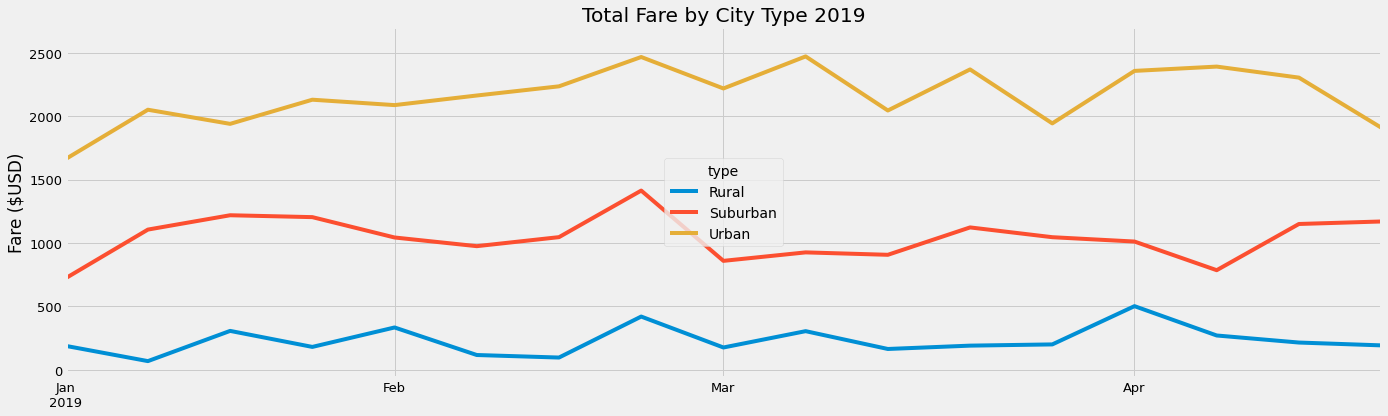

In [45]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


new_fare_sum_by_date_weekly_df.plot(kind = "line",
                            title = "Total Fare by City Type 2019",
                            xlabel = "", 
                            ylabel = "Fare ($USD)",
                            fontsize = 13,
                            ylim = (-60, 2700),
                            figsize = (21,6),
                            legend = "center"
                            )



#Confirm that your multiple-line chart looks like the following image, where each week is a peak or dip in the line graphs
